**Dataset** (torch.utils.data.Dataset) stores the samples and their corresponding labels, and **DataLoader** (torch.utils.data.DataLoader) wraps an iterable around the Dataset to enable easy access to the samples.

### Loading a Dataset

We load the FashionMNIST Dataset with the following parameters:
- **root** is the path where the train/test data is stored,
- **train** specifies training or test dataset,
- **download=True** downloads the data from the internet if it’s not available at root.
- **transform** specify the feature and label transformations

In [8]:
#importing libraries matplotlib and  torch, its datasets.
import torch
from torch.utils.data import Dataset
from torchvision import datasets

#importing ToTensor transform to convert the images of the loaded datasets into tensors

from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterating and Visualizing the Dataset

Let us index our datasets manually.

In [23]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

Using matplotlib we can see some samples of our training data.

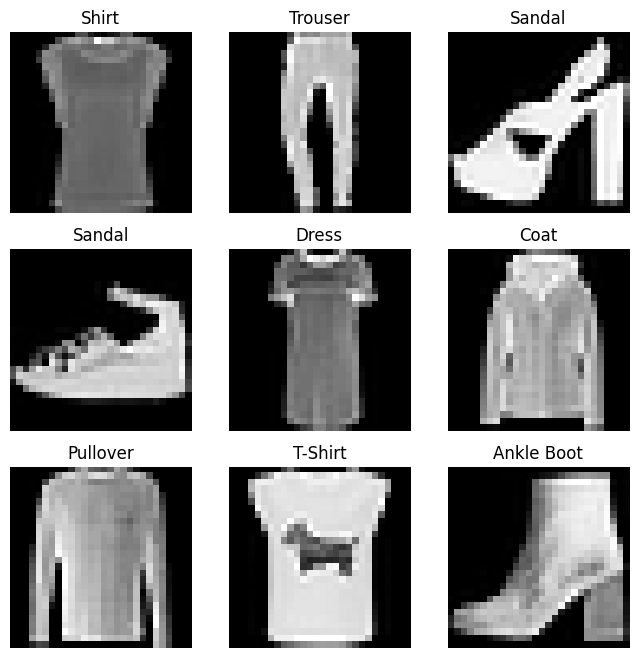

In [24]:
#setting up the size (with figsize) and number images in the plot with cols,rows
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

#extracting 9 images from the data at random for display
#since multiplication precedes addition in python the below for loop iterate from [1,10) i.e. 9 iterations
for i in range(1, cols * rows + 1):
    #below we are assigning random indexes using torch.randint
    #torch.randint takes 2 arguments, first the upper bound under which it has to generate random integers
    #and in the second argument it tells what the shape of the output of this randint function should be
    #here single element tensors....then we convert these into python sclar integers using item() function
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    #from the generated random integer we are refering to that element in the training dataset
    #and assigning the image and the label to the left hand side variables
    img, label = training_data[sample_idx]
    #This adds a subplot to the figure with the current index i, 
    #which determines its position in the grid.
    figure.add_subplot(rows, cols, i)
    #Below line puts the labels of the selected images as their title in the subplot
    plt.title(labels_map[label])
    #below line helps us in not having axis for each subplot as they are not required in our case here as they are images
    plt.axis("off")
    #now his method is useful when dealing with images represented as arrays or tensors with single-dimensional axes.
    #For instance, a grayscale image might be represented as a 2D array with shape (height, width, 1).
    #By using squeeze(), we remove the third axis with size 1 and obtain a 2D array with shape (height, width).
    #cmap is a parameter that specify the colormap to be used for displaying the image. 
    #experimenting with the different options of this argument can help us understand it better
    #https://matplotlib.org/stable/tutorials/colors/colormaps.html
    plt.imshow(img.squeeze(), cmap="gray")
#to display the plot
plt.show()

### Creating a Custom Dataset for your files

In [26]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.
                                              0.0/10.6 MB ? eta -:--:--
                                              0.2/10.6 MB 5.0 MB/s eta 0:00:03
     --                                       0.5/10.6 MB 6.7 MB/s eta 0:00:02
     --                                       0.7/10.6 MB 4.9 MB/s eta 0:00:03
     ----                                     1.3/10.6 MB 6.8 MB/s eta 0:00:02
     ------                                   1.8/10.6 MB 7.8 MB/s eta 0:00:02
     ---------                                2.4/10.6 MB 8.5 MB/s eta 0:00:01
     ----------                               2.8/10.6 MB 8.4 MB/s eta 0:00:01
     -----------                              3.1/10.6 MB 8.6 MB/s eta 0:00:01
     ------------                             3.3/10.6 MB 8.2 MB/s eta 0:00:01
     -------------                            3.5/10.6 MB 7.4 MB/s eta 0:00:01
     -------------                            3.7/10.6 MB 7.3 MB/s eta 0


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
#importing libraries os and pandas and read_image function from torchvision.io module
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    #below we have class constructor __init__ with arguments as follows:
    #annotations_file that have the path to the csv file that contains image filenames and corresponding labels
    #image directory and the other 2 for the transformation of the image and label respectively
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        #the following four lines initialise the respective things for the dataset when the class is invoked
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        #returns the total number of samples in the dataset
        return len(self.img_labels)

    def __getitem__(self, idx):
        #we get the path using the right hand side and assign the value into the variable on the right
        # we use information initialise from the __init__ like the img_dir and labels
        #iloc method is to pass through the csv file and get the location mentioned here it is idx(specified row) and 0 1st column
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        #now we convert the picked image from above into a pytorch tensor format using read_image
        image = read_image(img_path)
        #now second column i.e. the label
        label = self.img_labels.iloc[idx, 1]
        #below 4 lines is to indicate - transformations if required
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        #we return the image and the label at the end of this function
        return image, label

### Preparing your data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

In [28]:
#importing dataloader
from torch.utils.data import DataLoader

#using dataloader for training and then for testing
#batch size refers to the number of images per the minibatch discussed above
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Iterate through the Dataloader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


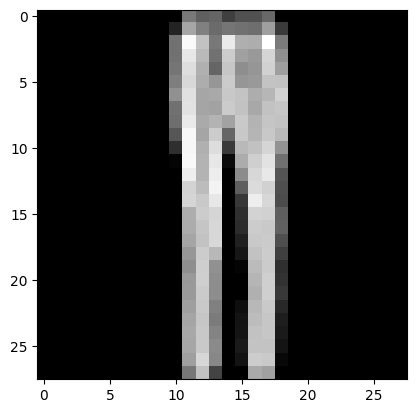

Label: 1


In [29]:
# Display image and label.

#Below line uses the iter() function to create an iterator from the train_dataloader.
#The next() function is then used to fetch the first batch of data samples from the iterator.
#In this case, train_features will contain the input image tensors (features),
#and train_labels will contain label tensors for the first batch of data.
train_features, train_labels = next(iter(train_dataloader))

#This line prints the shape of the batch of image tensors (train_features).
#The shape will depend on the batch size and the image dimensions. 
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

#Below line extracts the first image from the batch (train_features[0]) and uses
#squeeze() to remove any single-dimensional axes.
img = train_features[0].squeeze()
label = train_labels[0]

#imshow for image and next line to plot it
plt.imshow(img, cmap="gray")
plt.show()

#Prints the label of the slected image
print(f"Label: {label}")